In [33]:
import pandas as pd
import numpy as np
df = pd.read_csv("trends_with_stocks_output.csv")

In [34]:
df1 = df[["buy tesla", "elon musk", "model 3", "model y", "tsla stock", "tesla earnings", "car market", "electric vehicles", "environment", "elon musk fraud", "whistleblower", "union", "tesla debt", "subsidy", "Open", "High", "Low", "Close", "Out"]]
data = df1.to_numpy()
x = [arr[:18] for arr in data]
y = [arr[18] for arr in data]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

x_train = np.array(sc.fit_transform(x_train))
x_test = np.array(sc.fit_transform(x_test)).astype('float32')

print(len(x_train), len(x_train[0]))
print(len(y_train))

355 18
355


In [35]:
print(x_train)

[[0.2387683  0.08588649 0.3994791  ... 0.55112312 0.52751307 0.54127077]
 [0.14003029 0.03264691 0.4920005  ... 0.28312872 0.2517158  0.26308175]
 [0.19475013 0.07835259 0.61304725 ... 0.43970782 0.42713715 0.45078369]
 ...
 [0.03281171 0.03967855 0.5728637  ... 0.33079102 0.31102219 0.33378341]
 [0.05371025 0.02641888 0.34118814 ... 0.52148811 0.52146233 0.53354233]
 [0.29247855 0.20813661 0.32382488 ... 0.50555284 0.4964593  0.49571974]]


In [36]:
training_data = np.asarray(x_train)
training_labels = np.asarray(y_train)
test_data = np.asarray(x_test)
test_labels = np.asarray(y_test)

In [67]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

def plot_loss(l, vl):
    sn.set_style("darkgrid")
    plt.plot(l)
    plt.plot(vl)
    plt.show()
def plot_acc(acc, vacc):
    sn.set_style("darkgrid")
    plt.plot(acc)
    plt.plot(vacc)
    plt.show()
# plot confusion matrix
import seaborn as sn
def print_confusion_matrix(array):
  df_cm = pd.DataFrame(array, range(2), range(2))
  plt.figure(figsize = (10,7))
  sn.heatmap(df_cm, annot=True)

def get_out(val):
    if val>0.5:
        return 1
    else:
        return 0

class binary_classifier(object):
    def __init__(self, input_dim, hidden_dim):
      input_layer = Input(shape=(input_dim,))
      
      hidden_layer = Dense(hidden_dim, activation='relu')(input_layer)
      second_hidden_layer = Dense(hidden_dim, activation='relu')(hidden_layer)
      output_layer = Dense(1, activation='sigmoid')(second_hidden_layer)

      self._bm = Model(input_layer, output_layer)
      self._bm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    def train(self, training_data, training_labels, test_data, test_labels, batch_size, epochs):
      history = self._bm.fit(training_data, 
                                    training_labels,
                                    verbose=0,
                                    epochs = epochs,
                                    batch_size=batch_size,
                                    shuffle=True,
                                    validation_data=(
                                            test_data, 
                                            test_labels))
      accuracy = history.history['accuracy']
      loss = history.history['loss']
      val_accuracy = history.history['val_accuracy']
      val_loss = history.history['val_loss']
      return accuracy, loss, val_accuracy, val_loss
    
    def compute_confusion_matrix(self, test_data, test_labels):
        output = self._bm.predict(test_data)
        y_pred = [get_out(prediction) for prediction in output]
        #predicted_labels = np.array([item for item in y_pred])
        cm = confusion_matrix(y_pred, test_labels)
        return cm

Loss - Orange | Validation Loss - Blue


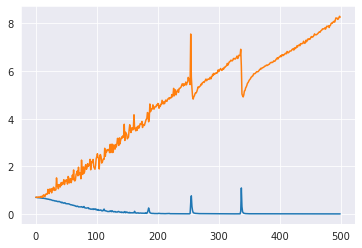

Accuracy - Orange | Validation Accuracy - Blue


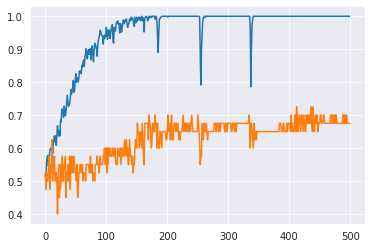

Confusion Matrix: 100 hidden neurons


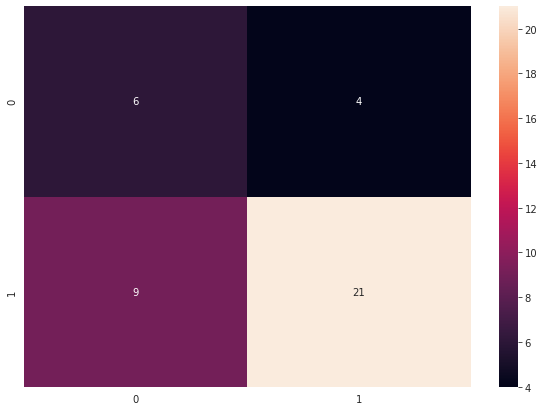

In [68]:
bc = binary_classifier(18, 100)
acc100, l100, vacc100, vl100 = bc.train(training_data, training_labels, test_data, test_labels, 10, 500)
cm100 = bc.compute_confusion_matrix(test_data, test_labels)
print("Loss - Orange | Validation Loss - Blue")
plot_loss(l100, vl100)
print("Accuracy - Orange | Validation Accuracy - Blue")
plot_acc(acc100, vacc100)
print("Confusion Matrix: 100 hidden neurons")
print_confusion_matrix(cm100)

Loss - Orange | Validation Loss - Blue


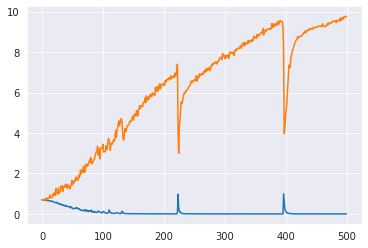

Accuracy - Orange | Validation Accuracy - Blue


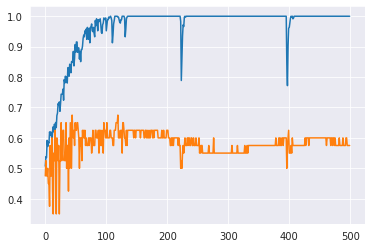

Confusion Matrix: 200 hidden neurons


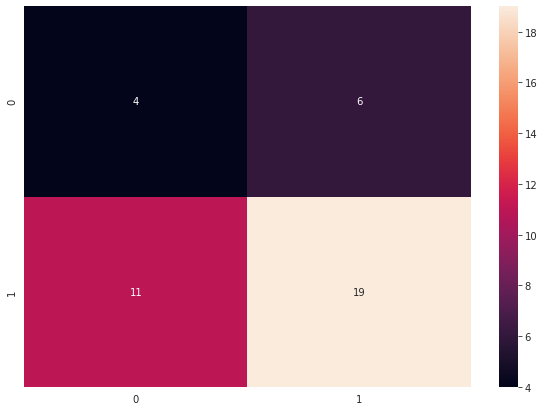

In [69]:
bc = binary_classifier(18, 200)
acc200, l200, vacc200, vl200 = bc.train(training_data, training_labels, test_data, test_labels, 10, 500)
cm200 = bc.compute_confusion_matrix(test_data, test_labels)
print("Loss - Orange | Validation Loss - Blue")
plot_loss(l200, vl200)
print("Accuracy - Orange | Validation Accuracy - Blue")
plot_acc(acc200, vacc200)
print("Confusion Matrix: 200 hidden neurons")
print_confusion_matrix(cm200)

Loss - Orange | Validation Loss - Blue


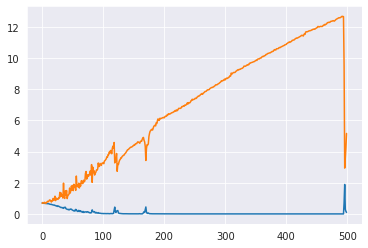

Accuracy - Orange | Validation Accuracy - Blue


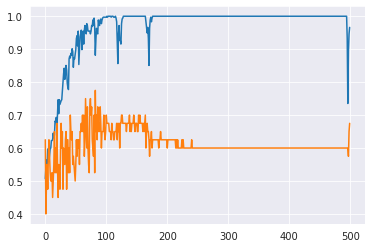

Confusion Matrix: 400 hidden neurons


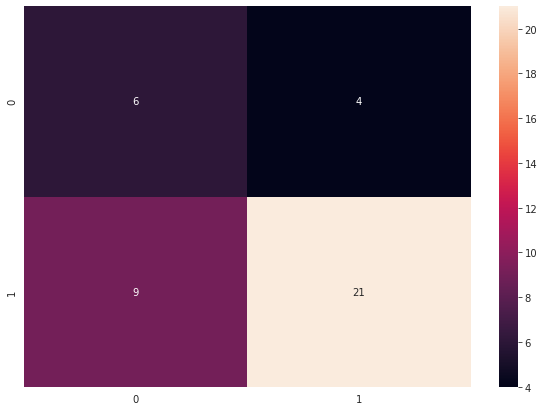

In [71]:
bc = binary_classifier(18, 400)
acc400, l400, vacc400, vl400 = bc.train(training_data, training_labels, test_data, test_labels, 10, 500)
cm400 = bc.compute_confusion_matrix(test_data, test_labels)
print("Loss - Orange | Validation Loss - Blue")
plot_loss(l400, vl400)
print("Accuracy - Orange | Validation Accuracy - Blue")
plot_acc(acc400, vacc400)
print("Confusion Matrix: 400 hidden neurons")
print_confusion_matrix(cm400)

Loss - Orange | Validation Loss - Blue


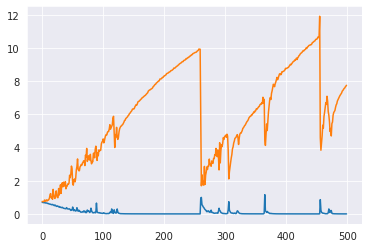

Accuracy - Orange | Validation Accuracy - Blue


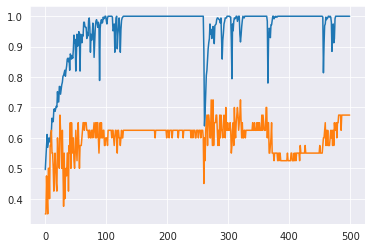

Confusion Matrix: 600 hidden neurons


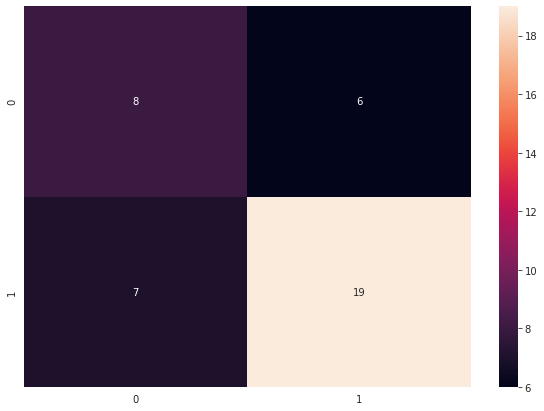

In [72]:
bc = binary_classifier(18, 600)
acc600, l600, vacc600, vl600 = bc.train(training_data, training_labels, test_data, test_labels, 10, 500)
cm600 = bc.compute_confusion_matrix(test_data, test_labels)
print("Loss - Orange | Validation Loss - Blue")
plot_loss(l600, vl600)
print("Accuracy - Orange | Validation Accuracy - Blue")
plot_acc(acc600, vacc600)
print("Confusion Matrix: 600 hidden neurons")
print_confusion_matrix(cm600)